In [3]:
import numpy as np
import pandas as pd
import os,sys,glob
#import matplotlib.pyplot as plt
import matplotlib as plt
import nibabel as nib
from nilearn import plotting

%matplotlib inline

# Variables de l'étude

In [4]:
STUDY_PATH=os.path.join('/NAS','dumbo','protocoles','PACTE1')
SCRIPT_PATH=os.path.join(STUDY_PATH,'scripts')
BIDS_PATH=os.path.join(STUDY_PATH,'data','bids')


# Variables générales des atlas

In [ ]:
# All parcelations list
parc = ['aparc-a2009s', 'aparc', 'economo', 'glasser-360',
         'schaefer-100','schaefer-200','schaefer-300','schaefer-400',
         'schaefer-500','schaefer-600','schaefer-700','schaefer-800',
         'schaefer-900','schaefer-1000','vosdewael-100','vosdewael-200',
         'vosdewael-300','vosdewael-400']

# Here we define the atlas 
atlas='aparc-a2009s'
#atlas=parc[0]

subcortical_labels = ['Left-Thalamus-Proper','Left-Caudate','Left-Putamen','Left-Pallidum','Left-Hippocampus','Left-Amygdala','Left-Accumbens-area','Right-Thalamus-Proper',
'Right-Caudate','Right-Putamen','Right-Pallidum','Right-Hippocampus','Right-Amygdala','Right-Accumbens-area']

cerebellum_labels = ['Left_I_IV','Right_I_IV','Left_V','Right_V','Left_VI','Vermis_VI','Right_VI','Left_CrusI','Vermis_CrusI','Right_CrusI','Left_CrusII','Vermis_CrusII','Right_CrusII', 'Left_VIIb','Vermis_VIIb','Right_VIIb','Left_VIIIa','Vermis_VIIIa','Right_VIIIa','Left_VIIIb','Vermis_VIIIb','Right_VIIIb','Left_IX','Vermis_IX','Right_IX','Left_X', 'Vermis_X','Right_X','Left_Dentate','Right_Dentate','Left_Interposed','Right_Interposed','Left_Fastigial','Right_Fastigial']

# Load LEFT annotation file in fsaverage5
annot_lh_fs5= nib.freesurfer.read_annot(f'/home/global/micapipe/parcellations/lh.{atlas}_mics.annot')
cortical_labels_lh = annot_lh_fs5[2][1:] 

# Load RIGHT annotation file in fsaverage5
annot_rh_fs5= nib.freesurfer.read_annot(f'/home/global/micapipe/parcellations/rh.{atlas}_mics.annot')
cortical_labels_rh = annot_rh_fs5[2][1:] 

labels=subcortical_labels.copy()
labels+=cerebellum_labels
labels+=['Unknown']
labels+=[labelC.decode('ASCII') + "_lh" for labelC in list(cortical_labels_lh)]
labels+=[labelC.decode('ASCII') + "_rh" for labelC in list(cortical_labels_rh)]
print("\nlen(subcortical_labels) = " + str(len(subcortical_labels)))
print("len(cerebellum_labels + Unknown) = " + str(len(cerebellum_labels)))
print("len(cortical_labels_lh) = " + str(len(cortical_labels_lh)))
print("len(cortical_labels_rh) = " + str(len(cortical_labels_rh)))
_=[print(str(i) + " : " + nom_label) for i,nom_label in enumerate(labels)]


len(subcortical_labels) = 14
len(cerebellum_labels + Unknown) = 34
len(cortical_labels_lh) = 75
len(cortical_labels_rh) = 75
0 : Left-Thalamus-Proper
1 : Left-Caudate
2 : Left-Putamen
3 : Left-Pallidum
4 : Left-Hippocampus
5 : Left-Amygdala
6 : Left-Accumbens-area
7 : Right-Thalamus-Proper
8 : Right-Caudate
9 : Right-Putamen
10 : Right-Pallidum
11 : Right-Hippocampus
12 : Right-Amygdala
13 : Right-Accumbens-area
14 : Left_I_IV
15 : Right_I_IV
16 : Left_V
17 : Right_V
18 : Left_VI
19 : Vermis_VI
20 : Right_VI
21 : Left_CrusI
22 : Vermis_CrusI
23 : Right_CrusI
24 : Left_CrusII
25 : Vermis_CrusII
26 : Right_CrusII
27 : Left_VIIb
28 : Vermis_VIIb
29 : Right_VIIb
30 : Left_VIIIa
31 : Vermis_VIIIa
32 : Right_VIIIa
33 : Left_VIIIb
34 : Vermis_VIIIb
35 : Right_VIIIb
36 : Left_IX
37 : Vermis_IX
38 : Right_IX
39 : Left_X
40 : Vermis_X
41 : Right_X
42 : Left_Dentate
43 : Right_Dentate
44 : Left_Interposed
45 : Right_Interposed
46 : Left_Fastigial
47 : Right_Fastigial
48 : Unknown
49 : G_and_S_fr

In [73]:
def load_fc(File):
    """Loads and process a functional connectome"""

    # load the matrix
    mtx_fs = nib.load(File).darrays[0].data

    # slice the matrix remove subcortical nodes and cerebellum = non car on veut la matrice entière
    # FC = mtx_fs[49:, 49:]
    FC = mtx_fs

    # Fisher transform
    FCz = np.arctanh(FC)

    # replace inf with 0
    FCz[~np.isfinite(FCz)] = 0

    # Mirror the matrix
    FCz = np.triu(FCz,1)+FCz.T
    return(FCz)


# Variables du patients

In [74]:
sub ="013_WRCO" #sys.argv[1]
ses="V0"
subjectID=f'sub-{sub}_ses-{ses}'
subjectDir=f'micapipe_v0.2.0/sub-{sub}/ses-{ses}' 
file_pattern = os.path.join(BIDS_PATH, 'derivatives_v2.0', subjectDir, 'func', 'desc-se_task-*_bold', 'surf', f'{subjectID}_atlas-{atlas}_desc-FC.shape.gii')
file_path = glob.glob(file_pattern)

print(file_path)
# Load the full connectome
mtx = load_fc(file_path[0])

if not os.path.exists(os.path.join(BIDS_PATH, 'derivatives_v2.0','NBS',f'sub-{sub}',f'ses-{ses}')):
    os.makedirs(os.path.join(BIDS_PATH, 'derivatives_v2.0','NBS',f'sub-{sub}',f'ses-{ses}'))

# FULL

(199, 199)


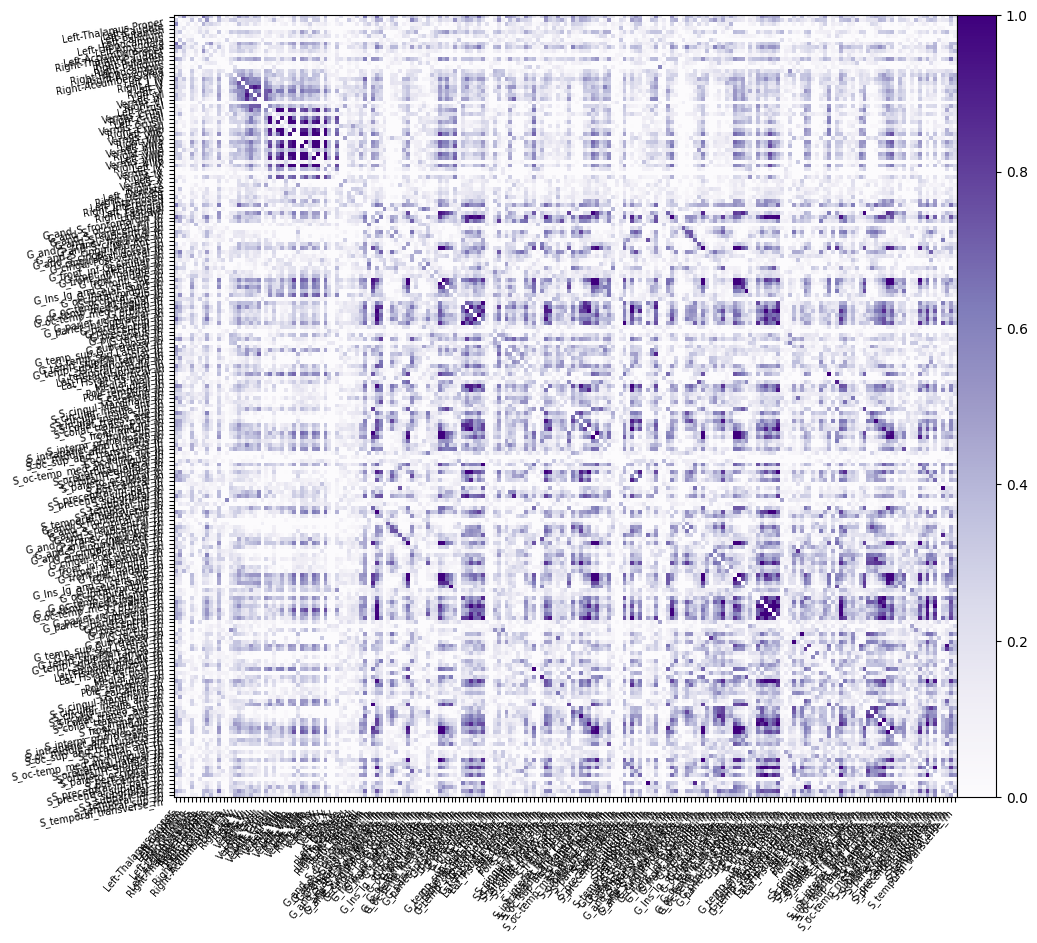

In [84]:
# Save full connectome to a txt file for NBS
np.savetxt(os.path.join(BIDS_PATH, 'derivatives_v2.0','NBS',f'sub-{sub}',f'ses-{ses}',f'{sub}_{ses}.txt'), mtx, delimiter=' ', fmt='%f')
print(mtx.shape)

# Plot matrix (without log)
corr_plot = plotting.plot_matrix(mtx, figure=(10, 10), labels=labels, cmap='Purples', vmin=0, vmax=1)
plt.pyplot.show()

# Wo medial wall

In [97]:
# Créer une nouvelle liste sans les éléments contenant "Medial_wall_"
labels_without_medial_wall = [label for label in labels if "Medial_wall_" not in label]
with open(os.path.join(BIDS_PATH, 'derivatives_v2.0', 'NBS', f'sub-{sub}', f'fMRInodeLabels_aparca2009s_fullnomedialwall.txt'), 'w') as f:
    for label in labels_without_medial_wall:
        f.write(f"{label}\n")

# Récupérer les indices des éléments contenant "Medial_wall_"
indices_medial_wall = [i for i, label in enumerate(labels) if "Medial_wall_" in label]

print("Labels without Medial_wall_:")
print(labels_without_medial_wall)
print("\nIndices of Medial_wall_ elements:")
print(indices_medial_wall)

mtx_nomedialwall = np.delete(mtx, indices_medial_wall, axis=0)
mtx_nomedialwall = np.delete(mtx_nomedialwall, indices_medial_wall, axis=1)

# Save full connectome to a txt file for NBS
np.savetxt(os.path.join(BIDS_PATH, 'derivatives_v2.0','NBS',f'sub-{sub}',f'ses-{ses}',f'{sub}_{ses}_womedialwall.txt'), mtx_nomedialwall, delimiter=' ', fmt='%f')

# Plot matrix (without log)
corr_plot = plotting.plot_matrix(mtx_nomedialwall, figure=(10, 10), labels=labels_without_medial_wall, cmap='Purples', vmin=0, vmax=1)
plt.pyplot.show()

Labels without Medial_wall_:
['Left-Thalamus-Proper', 'Left-Caudate', 'Left-Putamen', 'Left-Pallidum', 'Left-Hippocampus', 'Left-Amygdala', 'Left-Accumbens-area', 'Right-Thalamus-Proper', 'Right-Caudate', 'Right-Putamen', 'Right-Pallidum', 'Right-Hippocampus', 'Right-Amygdala', 'Right-Accumbens-area', 'Left_I_IV', 'Right_I_IV', 'Left_V', 'Right_V', 'Left_VI', 'Vermis_VI', 'Right_VI', 'Left_CrusI', 'Vermis_CrusI', 'Right_CrusI', 'Left_CrusII', 'Vermis_CrusII', 'Right_CrusII', 'Left_VIIb', 'Vermis_VIIb', 'Right_VIIb', 'Left_VIIIa', 'Vermis_VIIIa', 'Right_VIIIa', 'Left_VIIIb', 'Vermis_VIIIb', 'Right_VIIIb', 'Left_IX', 'Vermis_IX', 'Right_IX', 'Left_X', 'Vermis_X', 'Right_X', 'Left_Dentate', 'Right_Dentate', 'Left_Interposed', 'Right_Interposed', 'Left_Fastigial', 'Right_Fastigial', 'Unknown', 'G_and_S_frontomargin_lh', 'G_and_S_occipital_inf_lh', 'G_and_S_paracentral_lh', 'G_and_S_subcentral_lh', 'G_and_S_transv_frontopol_lh', 'G_and_S_cingul-Ant_lh', 'G_and_S_cingul-Mid-Ant_lh', 'G_and_S

# Remove SubCortical, Cerebellum and unknown nodes

0 : G_and_S_frontomargin_lh
1 : G_and_S_occipital_inf_lh
2 : G_and_S_paracentral_lh
3 : G_and_S_subcentral_lh
4 : G_and_S_transv_frontopol_lh
5 : G_and_S_cingul-Ant_lh
6 : G_and_S_cingul-Mid-Ant_lh
7 : G_and_S_cingul-Mid-Post_lh
8 : G_cingul-Post-dorsal_lh
9 : G_cingul-Post-ventral_lh
10 : G_cuneus_lh
11 : G_front_inf-Opercular_lh
12 : G_front_inf-Orbital_lh
13 : G_front_inf-Triangul_lh
14 : G_front_middle_lh
15 : G_front_sup_lh
16 : G_Ins_lg_and_S_cent_ins_lh
17 : G_insular_short_lh
18 : G_occipital_middle_lh
19 : G_occipital_sup_lh
20 : G_oc-temp_lat-fusifor_lh
21 : G_oc-temp_med-Lingual_lh
22 : G_oc-temp_med-Parahip_lh
23 : G_orbital_lh
24 : G_pariet_inf-Angular_lh
25 : G_pariet_inf-Supramar_lh
26 : G_parietal_sup_lh
27 : G_postcentral_lh
28 : G_precentral_lh
29 : G_precuneus_lh
30 : G_rectus_lh
31 : G_subcallosal_lh
32 : G_temp_sup-G_T_transv_lh
33 : G_temp_sup-Lateral_lh
34 : G_temp_sup-Plan_polar_lh
35 : G_temp_sup-Plan_tempo_lh
36 : G_temporal_inf_lh
37 : G_temporal_middle_lh
38

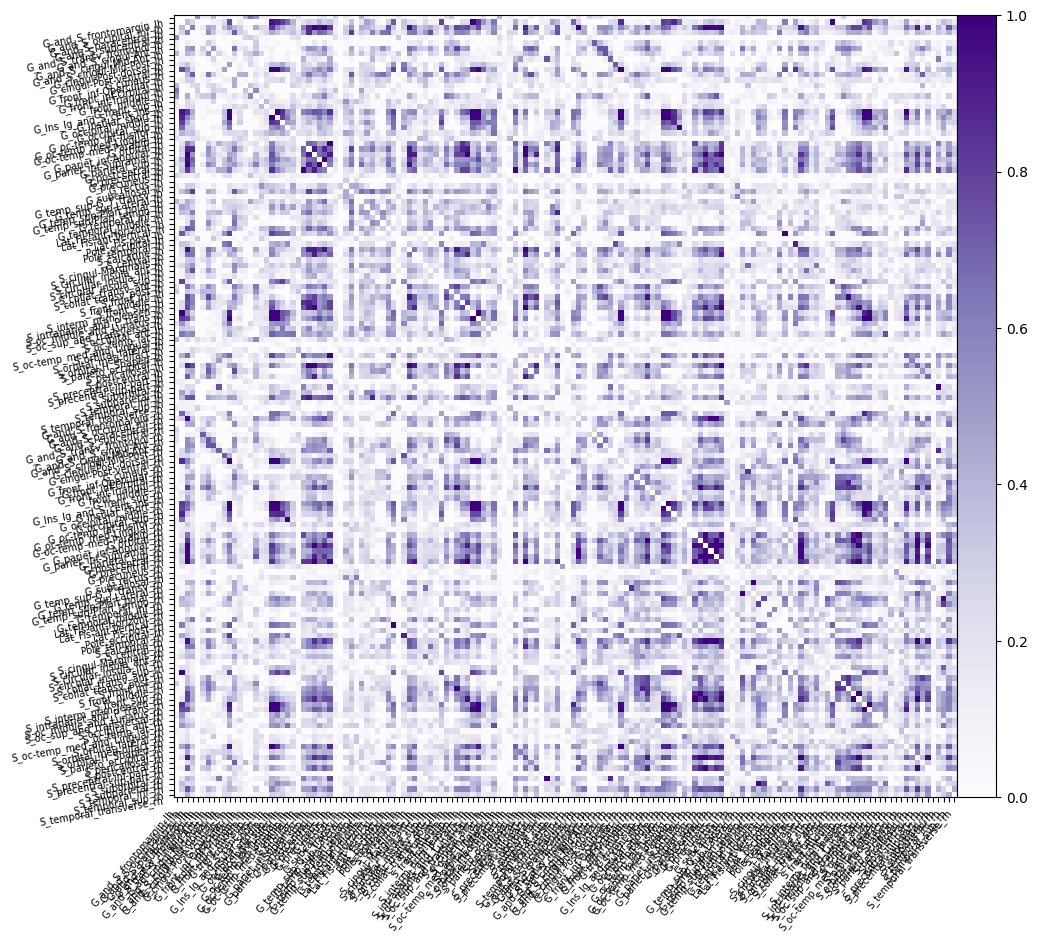

In [ ]:
labels_cortexnomedialwall = labels_without_medial_wall[49:]
[print(str(i) + " : " + nom_label) for i,nom_label in enumerate(labels_cortexnomedialwall)]

with open(os.path.join(BIDS_PATH, 'derivatives_v2.0', 'NBS', f'sub-{sub}', f'fMRInodeLabels_aparca2009s_cortexnomedialwall.txt'), 'w') as f:
    for label in labels_without_medial_wall:
        f.write(f"{label}\n")

mtx_cortexnomedialwall = mtx_nomedialwall[49:, 49:]

# Save full connectome to a txt file for NBS
np.savetxt(os.path.join(BIDS_PATH, 'derivatives_v2.0','NBS',f'sub-{sub}',f'ses-{ses}',f'{sub}_{ses}_cortexwomedialwall.txt'), mtx_cortexnomedialwall, delimiter=' ', fmt='%f')

# Plot matrix (without log)
corr_plot = plotting.plot_matrix(mtx_cortexnomedialwall, figure=(10, 10), labels=labels_cortexnomedialwall, cmap='Purples', vmin=0, vmax=1)
plt.pyplot.show()

 # Remove the Cerebellar and unknown nodes 

['Left-Thalamus-Proper', 'Left-Caudate', 'Left-Putamen', 'Left-Pallidum', 'Left-Hippocampus', 'Left-Amygdala', 'Left-Accumbens-area', 'Right-Thalamus-Proper', 'Right-Caudate', 'Right-Putamen', 'Right-Pallidum', 'Right-Hippocampus', 'Right-Amygdala', 'Right-Accumbens-area', 'G_and_S_frontomargin_lh', 'G_and_S_occipital_inf_lh', 'G_and_S_paracentral_lh', 'G_and_S_subcentral_lh', 'G_and_S_transv_frontopol_lh', 'G_and_S_cingul-Ant_lh', 'G_and_S_cingul-Mid-Ant_lh', 'G_and_S_cingul-Mid-Post_lh', 'G_cingul-Post-dorsal_lh', 'G_cingul-Post-ventral_lh', 'G_cuneus_lh', 'G_front_inf-Opercular_lh', 'G_front_inf-Orbital_lh', 'G_front_inf-Triangul_lh', 'G_front_middle_lh', 'G_front_sup_lh', 'G_Ins_lg_and_S_cent_ins_lh', 'G_insular_short_lh', 'G_occipital_middle_lh', 'G_occipital_sup_lh', 'G_oc-temp_lat-fusifor_lh', 'G_oc-temp_med-Lingual_lh', 'G_oc-temp_med-Parahip_lh', 'G_orbital_lh', 'G_pariet_inf-Angular_lh', 'G_pariet_inf-Supramar_lh', 'G_parietal_sup_lh', 'G_postcentral_lh', 'G_precentral_lh', '

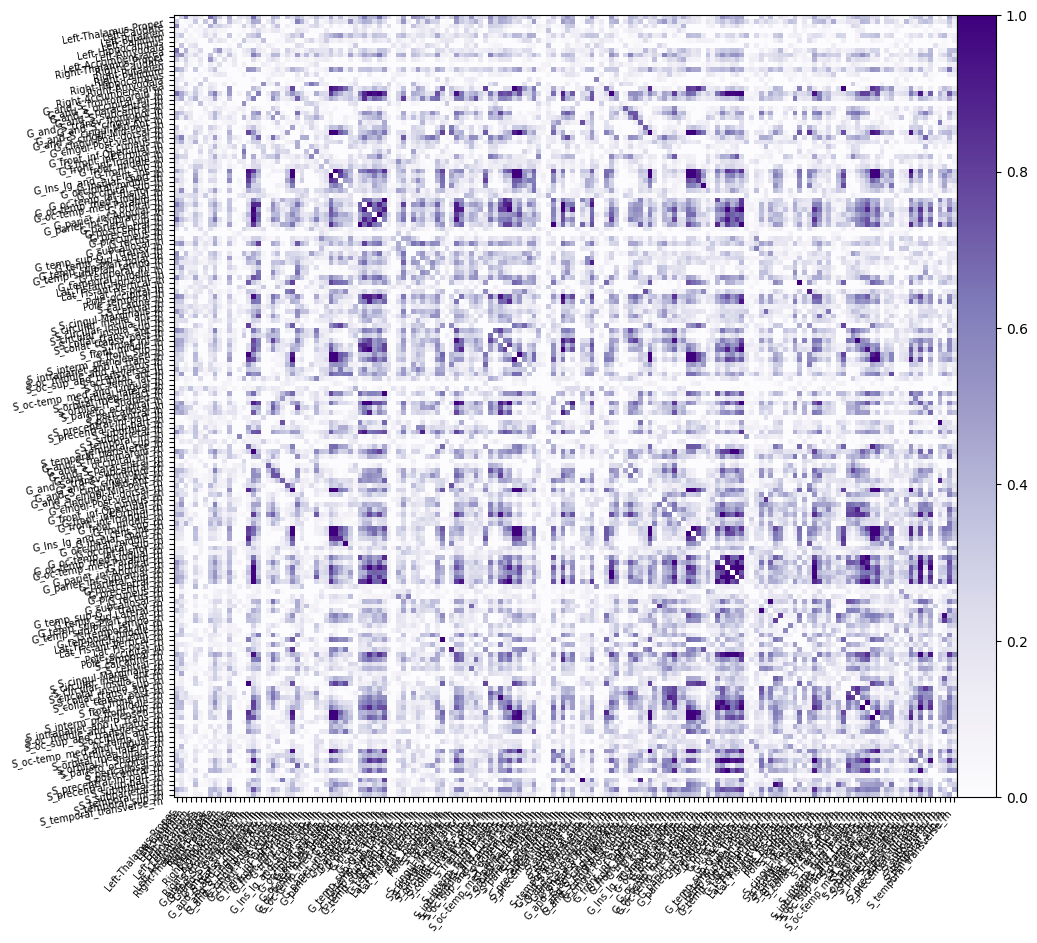

In [127]:

labels_new = labels_without_medial_wall.copy()
# Supprimer les 34 indices à partir du 14ième dans labels_without_medial_wall
del labels_new[14:14+35]

print(labels_new)
with open(os.path.join(BIDS_PATH, 'derivatives_v2.0', 'NBS', f'sub-{sub}', f'fMRInodeLabels_aparca2009s_cortexsubcorticalnomedialwall.txt'), 'w') as f:
    for label in labels_new:
        f.write(f"{label}\n")

# on retire les noeuds cérébelleux du connectome
mtx_cortexsubcorticalnomedialwall = mtx_nomedialwall.copy()
mtx_cortexsubcorticalnomedialwall=np.delete(mtx_cortexsubcorticalnomedialwall,range(14, 14+35), axis=0)
mtx_cortexsubcorticalnomedialwall=np.delete(mtx_cortexsubcorticalnomedialwall,range(14, 14+35), axis=1)

np.savetxt(os.path.join(BIDS_PATH, 'derivatives_v2.0','NBS',f'sub-{sub}',f'ses-{ses}',f'{sub}_{ses}_cortexsubcorticalnomedialwall.txt'), mtx_cortexsubcorticalnomedialwall, delimiter=' ', fmt='%f')
# Plot matrix (without log)
corr_plot = plotting.plot_matrix(mtx_cortexsubcorticalnomedialwall, figure=(10, 10), labels=labels_new, cmap='Purples', vmin=0, vmax=1)
plt.pyplot.show()

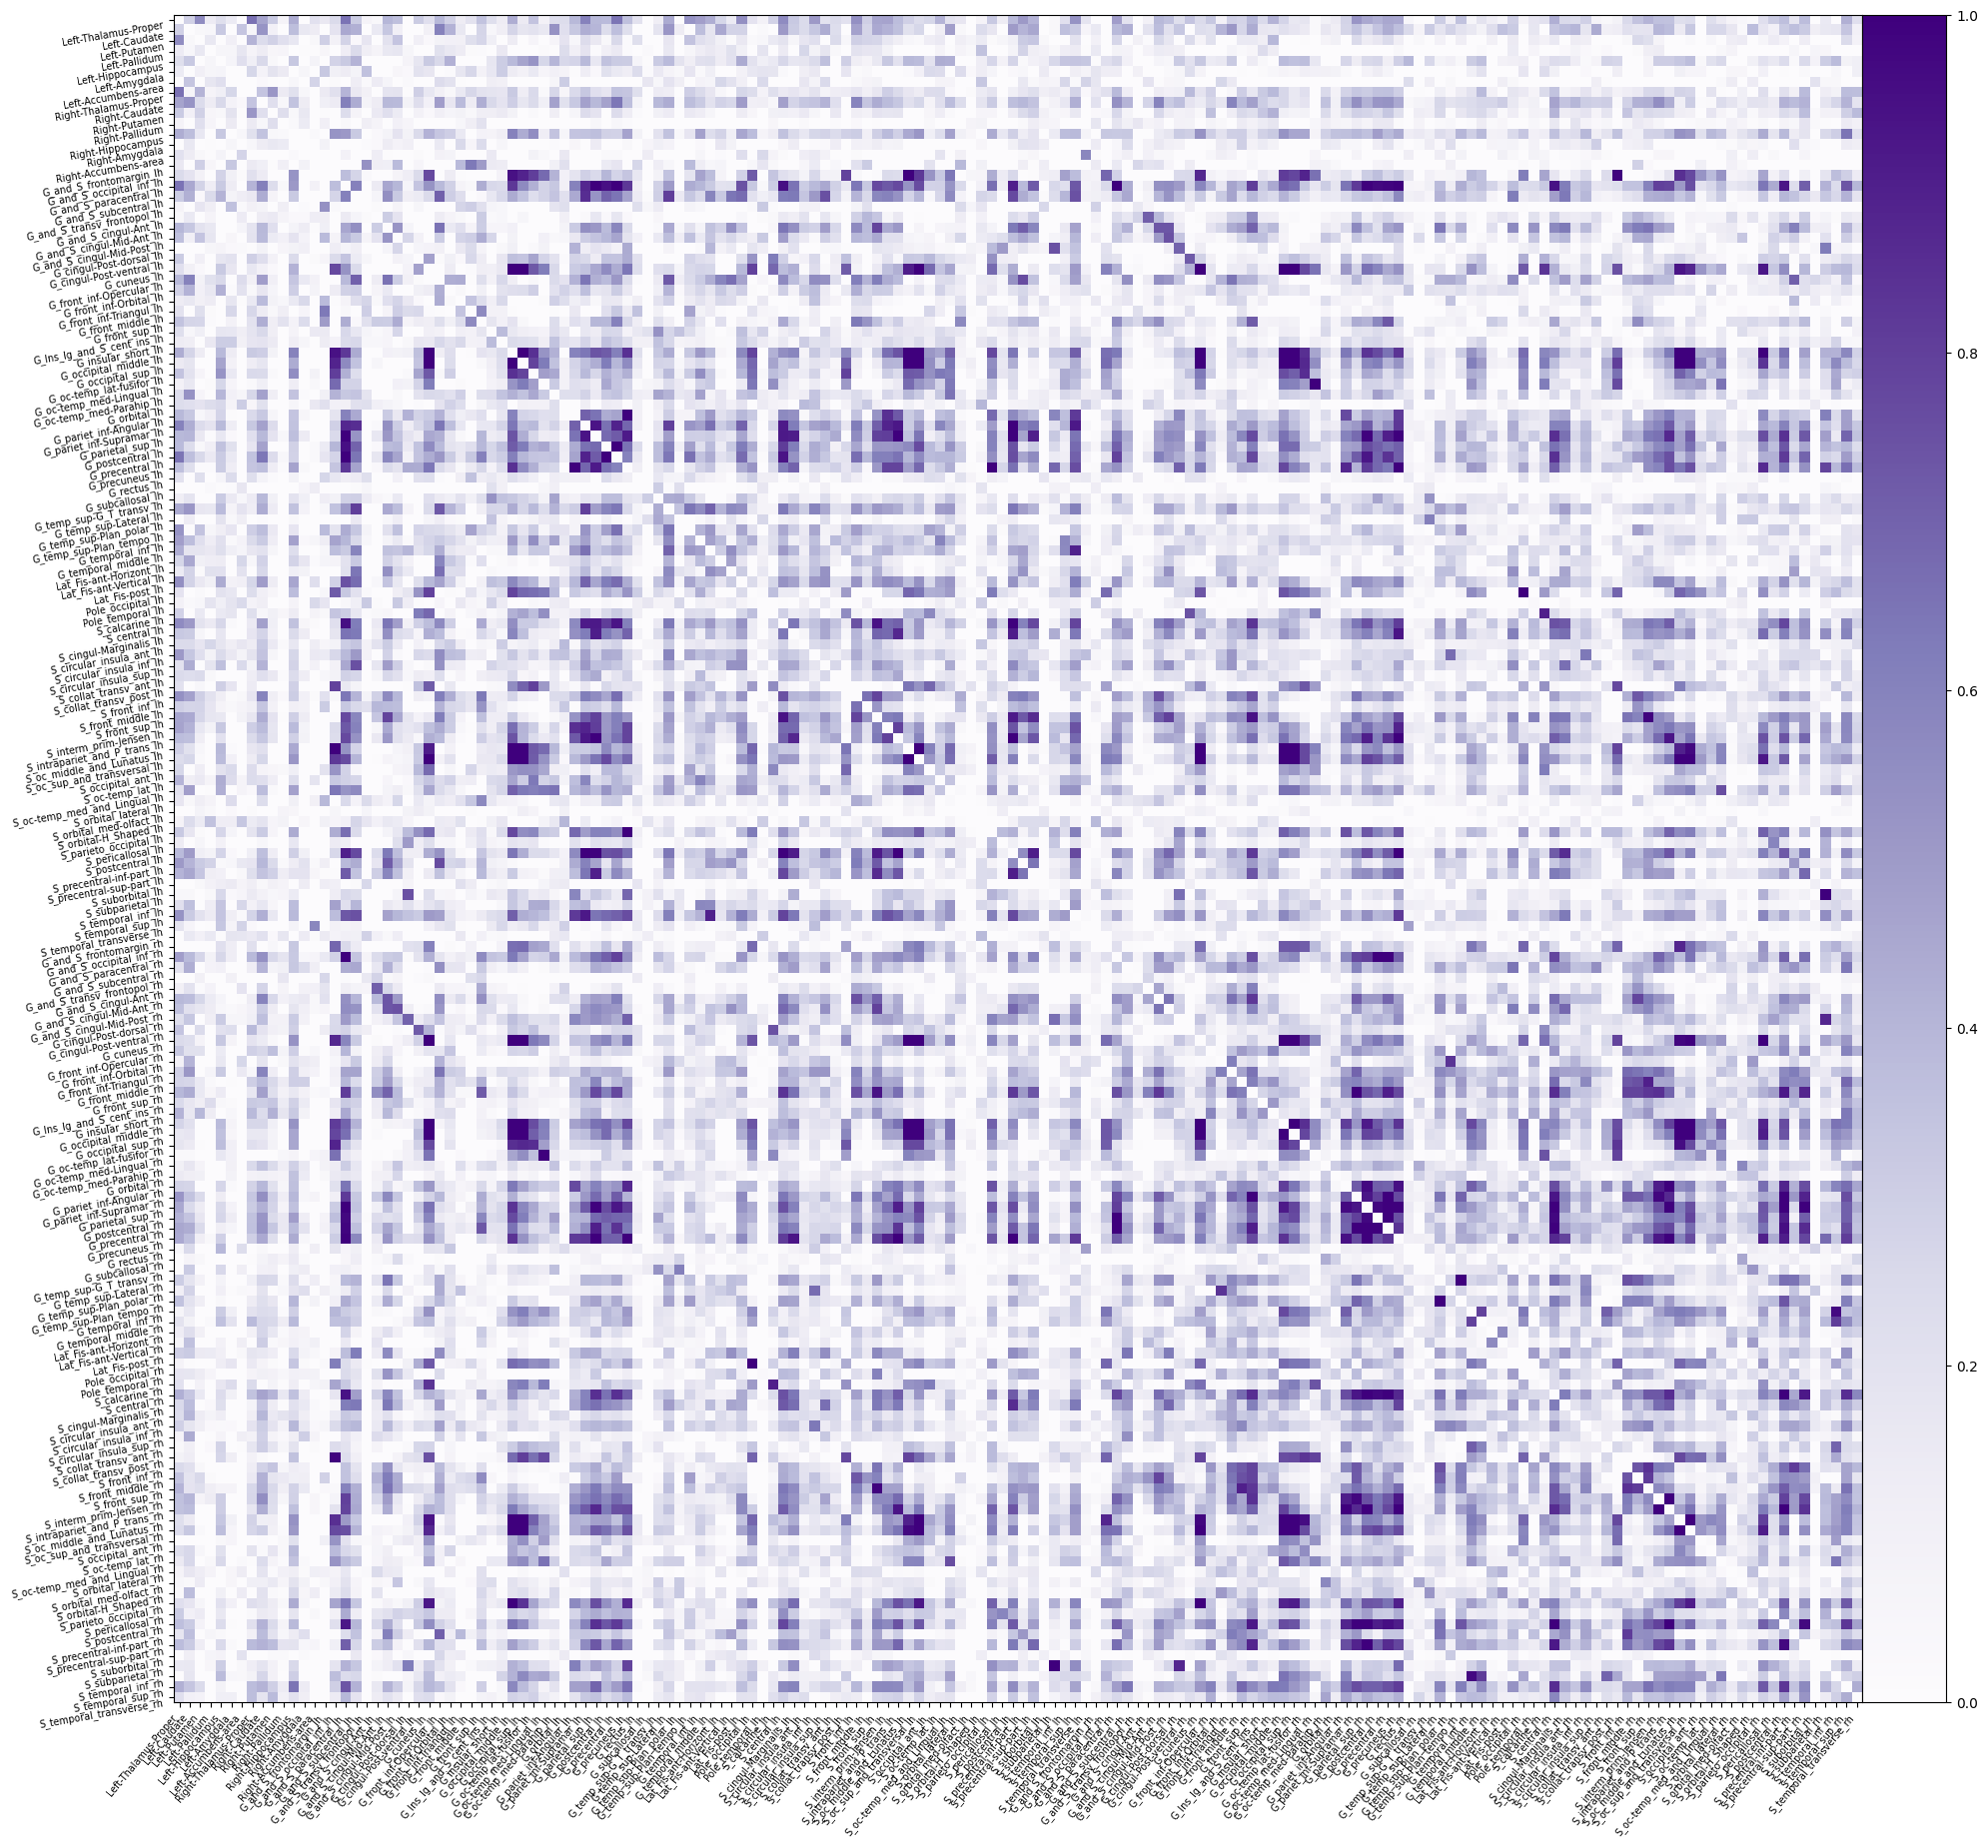

In [133]:

# Plot matrix (without log)
corr_plot = plotting.plot_matrix(mtx_cortexsubcorticalnomedialwall, figure=(20, 20), labels=labels_new, cmap='Purples', vmin=0, vmax=1)
plt.savefig(os.path.join(BIDS_PATH, 'derivatives_v2.0','NBS',f'sub-{sub}',f'ses-{ses}',f'{sub}_{ses}_cortexsubcorticalnomedialwall.jpg'), format='jpeg')

# BIDS Validator

In [ ]:
pip install bids_validator
pip install niworkflows


The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from bids_validator import BIDSValidator

In [11]:
os.path.join(STUDY_PATH,'ds000240','sub-01','anat','sub-01_T1w.nii.gz')

'/NAS/dumbo/protocoles/PACTE1/ds000240/sub-01/anat/sub-01_T1w.nii.gz'

In [9]:
BIDSValidator().is_bids(os.path.join(STUDY_PATH,'ds000240','sub-01','anat','sub-01_T1w.nii.gz'))

False

In [16]:
from niworkflows.utils.bids import collect_participants

BIDS_TEST=os.path.join(STUDY_PATH,'ds000240')
participants = collect_participants(BIDS_TEST)

print(participants)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63']


In [45]:
from niworkflows.utils.bids import collect_participants

participants = collect_participants("/NAS/dumbo/protocoles/PACTE1/data/bids_testSessionUnik")

print(participants)

BIDSValidationError: 'dataset_description.json' is missing from project root. Every valid BIDS dataset must have this file.
Example contents of 'dataset_description.json': 
{"Name": "Example dataset", "BIDSVersion": "1.0.2"}

In [17]:
from niworkflows.utils.bids import collect_participants

participants = collect_participants(BIDS_PATH)

print(participants)

BIDSError: 
---------- BIDS root folder: "/NAS/dumbo/protocoles/PACTE1/data/bids" ----------
           Could not find participants. Please make sure the BIDS data structure is present and correct. Datasets can be validated online using the BIDS Validator (https://bids-standard.github.io/bids-validator/).
If you are using Docker for Mac or Docker for Windows, you may need to adjust your "File sharing" preferences.
--------------------------------------------------------------------------------

In [43]:
import os
import shutil

def transform_bids_directory(input_dir, output_dir):
    # Parcourir chaque participant dans le répertoire d'entrée
    for sub_dir in os.listdir(input_dir):
        if sub_dir.startswith('sub-'):
            sub_path = os.path.join(input_dir, sub_dir)
            if os.path.isdir(sub_path):
                # Parcourir chaque session du participant
                for ses_dir in os.listdir(sub_path):
                    if ses_dir.startswith('ses-'):
                        ses_path = os.path.join(sub_path, ses_dir)
                        if os.path.isdir(ses_path):
                            # Créer un nouveau nom de participant en combinant sub et ses
                            new_sub_label = f"{sub_dir}_{ses_dir}"
                            new_sub_path = os.path.join(output_dir, new_sub_label)

                            # Copier la structure des répertoires (anat, func, etc.)
                            for data_type_dir in os.listdir(ses_path):
                                data_type_path = os.path.join(ses_path, data_type_dir)
                                if os.path.isdir(data_type_path):
                                    new_data_type_path = os.path.join(new_sub_path, data_type_dir)
                                    os.makedirs(new_data_type_path, exist_ok=True)

                                    # Copier et renommer les fichiers
                                    for file_name in os.listdir(data_type_path):
                                        if file_name.endswith('.nii.gz') or file_name.endswith('.json'):
                                            old_file_path = os.path.join(data_type_path, file_name)
                                            new_file_name = file_name.replace(sub_dir, new_sub_label, 1).replace(ses_dir, '', 1)
                                            new_file_path = os.path.join(new_data_type_path, new_file_name)
                                            shutil.copyfile(old_file_path, new_file_path)

# Exemple d'utilisation

output_directory = os.path.join(STUDY_PATH,'data','bids_testSessionUnik')

# Créer le répertoire de sortie s'il n'existe pas
os.makedirs(output_directory, exist_ok=True)

# Transformer la base de données BIDS
transform_bids_directory(BIDS_PATH, output_directory)


In [48]:
import os
import shutil
import csv

def load_mapping(csv_file):
    mapping = {}
    with open(csv_file, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            mapping[row['old_participant_id']] = row['new_participant_id']
    return mapping

def rename_bids_directory(input_dir, mapping):
    # Parcourir chaque participant dans le répertoire d'entrée
    for sub_dir in os.listdir(input_dir):
        if sub_dir in mapping:
            old_sub_path = os.path.join(input_dir, sub_dir)
            new_sub_label = mapping[sub_dir]
            new_sub_path = os.path.join(input_dir, new_sub_label)

            # Renommer le répertoire du participant
            os.rename(old_sub_path, new_sub_path)

            # Parcourir les types de données (anat, func, etc.)
            for data_type_dir in os.listdir(new_sub_path):
                data_type_path = os.path.join(new_sub_path, data_type_dir)
                if os.path.isdir(data_type_path):
                    # Renommer les fichiers
                    for file_name in os.listdir(data_type_path):
                        if file_name.endswith('.nii.gz') or file_name.endswith('.json') or file_name.endswith('.tsv'):
                            old_file_path = os.path.join(data_type_path, file_name)
                            new_file_name = file_name.replace(sub_dir, new_sub_label, 1)
                            new_file_path = os.path.join(data_type_path, new_file_name)
                            os.rename(old_file_path, new_file_path)

# Exemple d'utilisation
input_directory = os.path.join(STUDY_PATH,'data','bids_test3','sub-004','ses-V0')

csv_file = os.path.join(STUDY_PATH,'participant_mapping.csv')

# Charger la table de correspondance
mapping = load_mapping(csv_file)

# Renommer les participants dans la base de données BIDS
rename_bids_directory(input_directory, mapping)
